#### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/full_data.csv')

#### Data analysis

In [3]:
df.columns

Index(['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10',
       ...
       'Zimag42', 'Zimag43', 'Zimag44', 'Zimag45', 'Zimag46', 'Zimag47',
       'Zimag48', 'Zimag49', 'Zimag50', 'Concentration'],
      dtype='object', length=101)

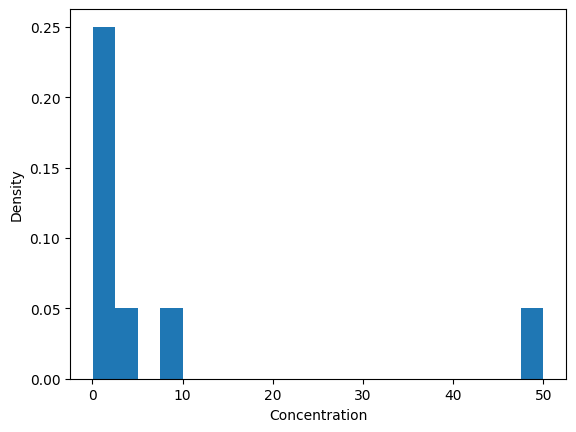

In [4]:
plt.hist(df['Concentration'],bins=20,density=True)
plt.xlabel('Concentration'),plt.ylabel('Density')
plt.show()

In [5]:
df_filtered = df[df.Concentration < 10]

#### Model training

In [6]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [7]:
def r_quadrado_sem_intercepto(y_real, y_predito):
    return 1 - (np.sum((y_real - y_predito) ** 2) / np.sum(y_real**2))

##### Unfiltered

In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [10]:
SEMENTE_ALEATORIA = 410

modelo_simples = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)

modelo_simples.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=6, random_state=410)

In [11]:
preditos = modelo_simples.predict(X_test)
print(mean_squared_error(y_test, preditos,squared=False))

35.29489742610859


In [12]:
modelo_complexo = DecisionTreeRegressor(
    random_state=SEMENTE_ALEATORIA,
)

modelo_complexo.fit(X_train, y_train)

DecisionTreeRegressor(random_state=410)

In [13]:
preditos = modelo_complexo.predict(X_test)
print(mean_squared_error(y_test, preditos,squared=True))

1231.3006500000001


##### Concentration in log

In [14]:
y_log = np.log10(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.1, random_state=42)

In [16]:
SEMENTE_ALEATORIA = 410

modelo_simples = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)

modelo_simples.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=6, random_state=410)

In [17]:
preditos = modelo_simples.predict(X_test)
print(mean_squared_error(y_test, preditos,squared=False))

1.1756839862992758


In [18]:
print(f'R^2: {round(r_quadrado_sem_intercepto(y_test, preditos),4)}')

R^2: 0.3903


In [19]:
modelo_complexo = DecisionTreeRegressor(
    random_state=SEMENTE_ALEATORIA,
)

modelo_complexo.fit(X_train, y_train)

DecisionTreeRegressor(random_state=410)

In [20]:
preditos = modelo_complexo.predict(X_test)
print(mean_squared_error(y_test, preditos,squared=False))

1.4121896237689706


In [21]:
print(f'R^2: {round(r_quadrado_sem_intercepto(y_test, preditos),4)}')

R^2: 0.1203


##### Filtered

In [22]:
X_filtered = df_filtered.iloc[:,:-1]
y_filtered = df_filtered.iloc[:,-1]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.1, random_state=42)

In [24]:
SEMENTE_ALEATORIA = 410

modelo_simples = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)

modelo_simples.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=6, random_state=410)

In [25]:
preditos = modelo_simples.predict(X_test)
print(mean_squared_error(y_test, preditos,squared=False))

0.04809019304043879


In [26]:
modelo_complexo = DecisionTreeRegressor(
    random_state=SEMENTE_ALEATORIA,
)

modelo_complexo.fit(X_train, y_train)

DecisionTreeRegressor(random_state=410)

In [27]:
preditos = modelo_complexo.predict(X_test)
print(mean_squared_error(y_test, preditos,squared=True))

0.0013666666666666669


In [28]:
print(f'R^2: {round(r_quadrado_sem_intercepto(y_test, preditos),4)}')

R^2: 0.9959


##### Visualization

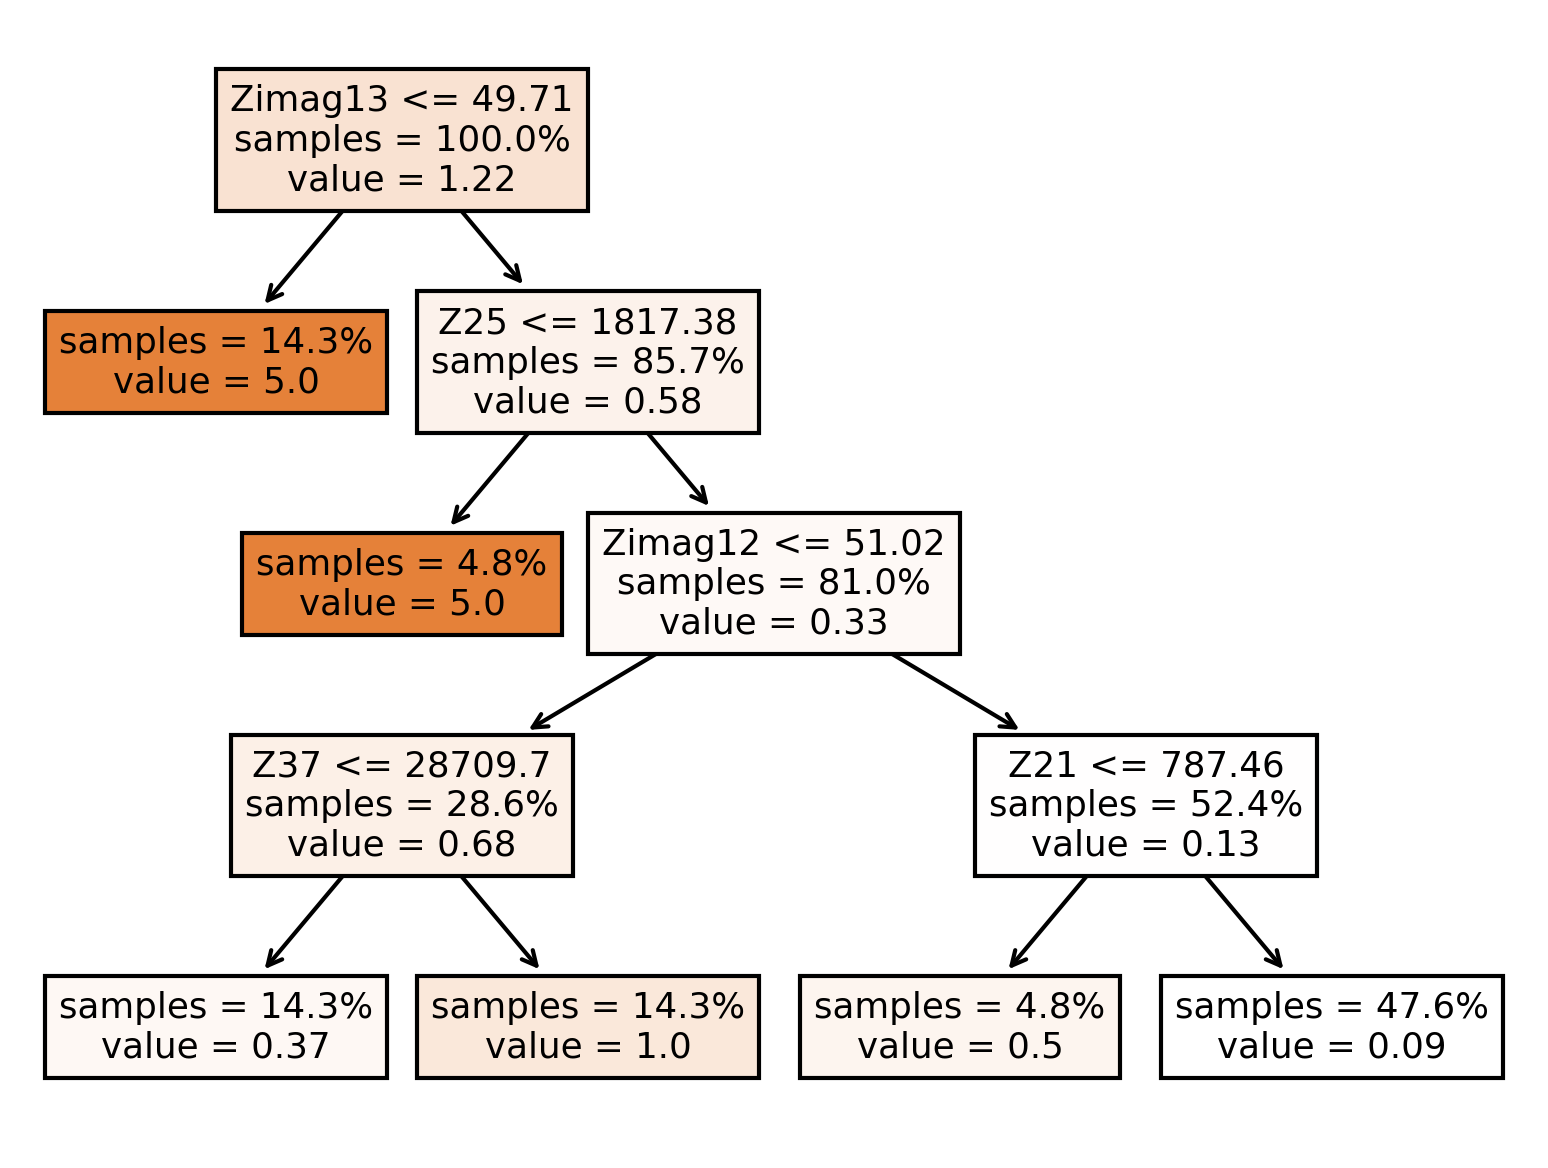

In [29]:
figura, eixo = plt.subplots(dpi=300)

plot_tree(
    modelo_simples,
    feature_names=X.columns,
    ax=eixo,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
);

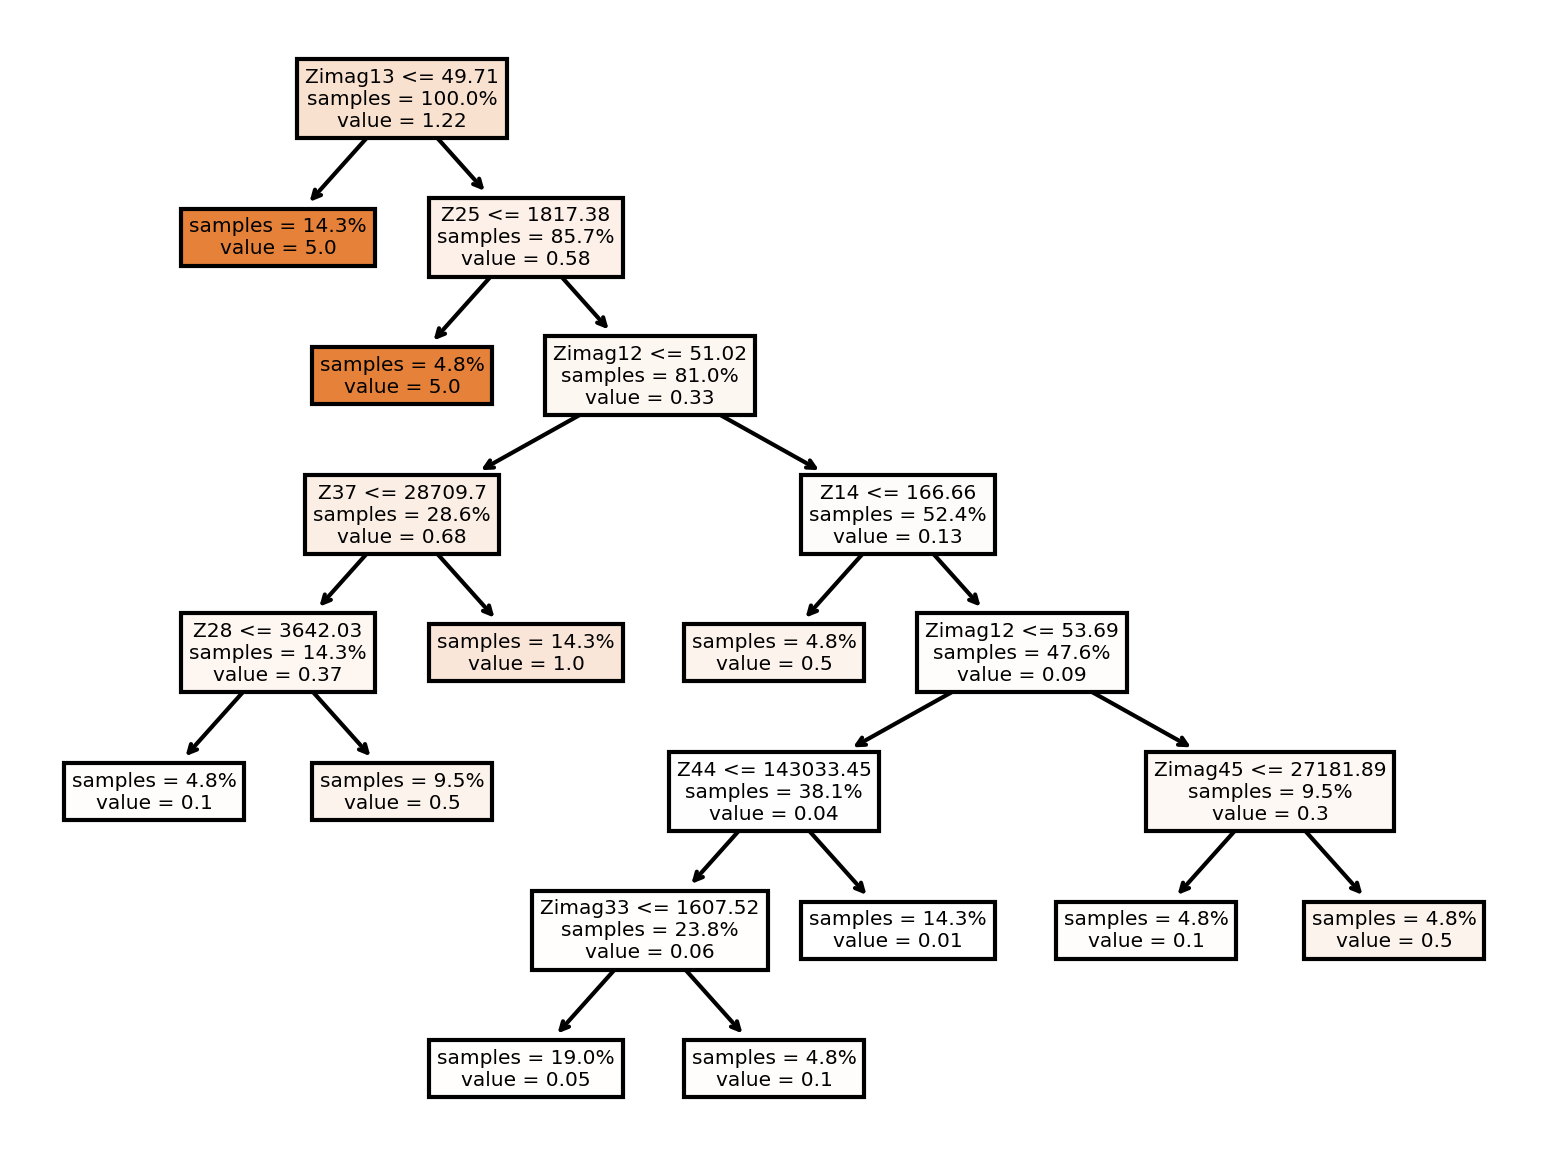

In [30]:
figura, eixo = plt.subplots(dpi=300)

plot_tree(
    modelo_complexo,
    feature_names=X.columns,
    ax=eixo,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
);

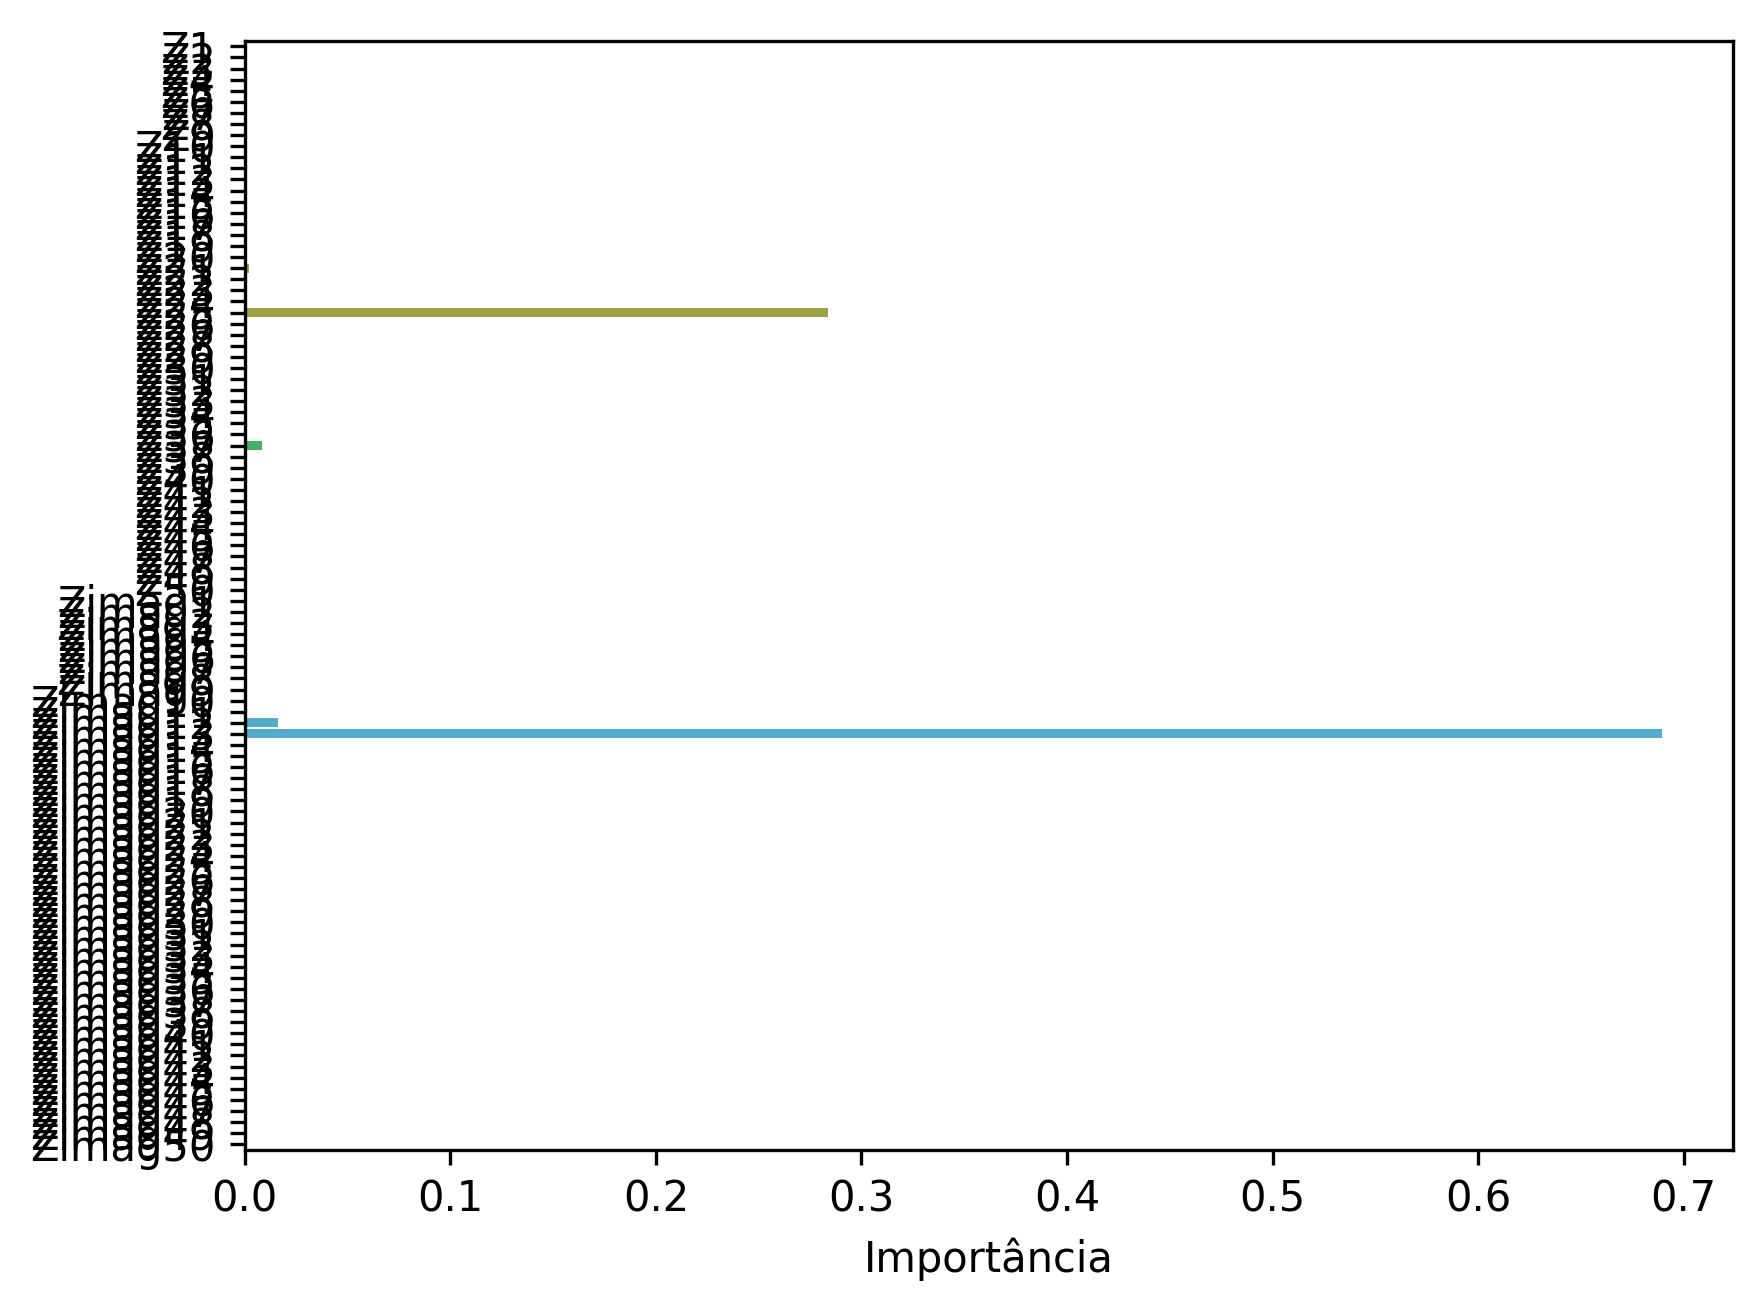

In [31]:
atributos = X.columns
importancias = modelo_simples.feature_importances_

figura, eixo = plt.subplots(dpi=300)

eixo = sns.barplot(x=importancias, y=atributos)
eixo.set_xlabel("Importância");

In [32]:
for i,importancia in enumerate(importancias):
    if importancia > 0:
        print(atributos[i],importancia)

Z21 0.0020713141219039733
Z25 0.28388002342821456
Z37 0.008275719923936211
Zimag12 0.016350028485995424
Zimag13 0.6894229140399499
